In [1]:
import pandas as pd

# Load cleaned IPIP Big Five dataset
personality_df = pd.read_csv("C:\\Users\\patil\\Downloads\\processed_personality_traits.csv")

# Preview the first 5 rows
print("Big Five Personality Dataset:")
print(personality_df.head())

# Load the LinkedIn dataset (scraped or public)
linkedin_df = pd.read_excel("C:\\Users\\patil\\Downloads\\linkedin_profiles.xlsx")

# Preview the first 5 rows
print("\nLinkedIn Dataset:")
print(linkedin_df.head())



Big Five Personality Dataset:
   Extraversion  Neuroticism  Agreeableness  Conscientiousness  Openness
0           4.6          2.4            3.9                3.2       4.5
1           2.0          2.5            4.4                3.7       3.5
2           2.5          2.6            4.2                3.4       4.1
3           2.6          2.9            3.8                2.5       3.9
4           3.2          2.2            3.8                3.7       4.4

LinkedIn Dataset:
                                                 URL            Name  \
0             https://www.linkedin.com/in/darbyhelm/      Darby Helm   
1             https://www.linkedin.com/in/darbyhelm/      Darby Helm   
2  https://www.linkedin.com/in/jaydeep-patil-9b98...   Jaydeep Patil   
3        https://www.linkedin.com/in/namana-kanchan/  Namana Kanchan   
4          https://www.linkedin.com/in/meloni-patel/    Meloni Patel   

                        Location  \
0  Tempe, Arizona, United States   
1  Tempe

In [2]:
linkedin_df.drop(columns=['URL'], inplace=True)

# 2. Drop exact duplicate rows
linkedin_df.drop_duplicates(inplace=True)

# 3. Fill missing text fields with empty strings
text_columns = ['Headline', 'About', 'Experience', 'Education', 'Skills', 'Total Experience', 'Connections']
linkedin_df[text_columns] = linkedin_df[text_columns].fillna('')
linkedin_df.reset_index(drop=True, inplace=True)

# Save the cleaned version 
linkedin_df.to_csv('linkedin_cleaned.csv', index=False)

print("Shape after cleaning:", linkedin_df.shape)
print(linkedin_df.head())

Shape after cleaning: (862, 9)
             Name                       Location  \
0      Darby Helm  Tempe, Arizona, United States   
1      Darby Helm  Tempe, Arizona, United States   
2   Jaydeep Patil  Tempe, Arizona, United States   
3  Namana Kanchan  Tempe, Arizona, United States   
4    Meloni Patel  Tempe, Arizona, United States   

                                            Headline  \
0                Student at Arizona State University   
1                Student at Arizona State University   
2  Actively seeking full-time opportunities in We...   
3  Master’s Student in Software Engineering at AS...   
4  ASU MS CS'26 | Summer Analyst '23 @Goldman Sac...   

                                               About  \
0  I am a hardworking individual with many years ...   
1  I am a hardworking individual with many years ...   
2                                                      
3  As a passionate Software Engineer with 3 years...   
4  Hi, I’m Meloni Patel, a graduate stu

In [3]:
print("Shape of Big Five dataset:", personality_df.shape)

Shape of Big Five dataset: (696845, 5)


In [4]:
print(personality_df.columns)
personality_df.head()

Index(['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness',
       'Openness'],
      dtype='object')


,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,4.6,2.4,3.9,3.2,4.5
1,2.0,2.5,4.4,3.7,3.5
2,2.5,2.6,4.2,3.4,4.1
3,2.6,2.9,3.8,2.5,3.9
4,3.2,2.2,3.8,3.7,4.4


In [5]:
import pandas as pd

# Fill NaNs with empty string and create summary
text_fields = ['Headline', 'About', 'Experience', 'Education', 'Skills']
linkedin_df[text_fields] = linkedin_df[text_fields].fillna("")

linkedin_df['profile_summary'] = linkedin_df[text_fields].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


In [6]:
print(linkedin_df.shape)  

(862, 10)


# Generating linkedIn profile summary for each profile by merging the text columns

In [7]:
print(linkedin_df[['Name', 'profile_summary']].head())


             Name                                    profile_summary
0      Darby Helm  Student at Arizona State University I am a har...
1      Darby Helm  Student at Arizona State University I am a har...
2   Jaydeep Patil  Actively seeking full-time opportunities in We...
3  Namana Kanchan  Master’s Student in Software Engineering at AS...
4    Meloni Patel  ASU MS CS'26 | Summer Analyst '23 @Goldman Sac...


# Printing summmary of a random LinkedIn user from the dataset

In [8]:
print(linkedin_df.loc[0, 'profile_summary'])

Student at Arizona State University I am a hardworking individual with many years of experience in the business and service industries. My strengths involve problem solving, critical thinking, communication, and a passion to succeed. My professional goal is to find employment in a company rich with collaboration and offering limitless growth opportunities. My internal motivation is fierce, fueled by my family, social network, ASU business major coursework, and past employment experiences. Business Operations. Avnet · Internship. Mar 2025 to Present · 2 mos. Arizona, United States · Hybrid

Server. FAT Brands Inc. · Part-time. May 2024 to Mar 2025 · 11 mos. United States · On-site

Receptionist. Evolve Beauty Bar & Spa · Part-time. Jun 2023 to Dec 2024 · 1 yr 7 mos. Elmhurst, Illinois, United States [{"school": "Arizona State University", "degree": "Activities and societies: Pi Beta Phi Fraternity\nSCMA Member", "date_range": "2023 - 2027", "extra_info": ["I am an active member of the P

In [9]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


# Loading the JSON file with Big 5 surevey questions data

Here we have used **cosine similarity** to predict the values for the OCEAN personality model labels for our scraped linkedin profiles.
The values in the Personality predcition dataset are analysed and assigned to the linkedin profiles using cosine similarity.
For each profile there would be five labels 
1. EXTRAVERSION
2. NEUROTICISM
3. AGREEABLENESS
4. CONSCIENTIOUSNESS
5. OPENNESS

And a value ranging from 0 to 5 would be assigned to the profile 0 being the lowest and 5 being the highest.

In [10]:
import json
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Load the Big 5 trait sentences from the JSON file
with open("C:\\Users\\patil\\Downloads\\Sentences.json", "r") as f:
    big5_traits = json.load(f)

# Load pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  

# Generate embeddings for trait sentences
trait_embeddings = {}
for trait, sentences in big5_traits.items():
    trait_embeddings[trait] = model.encode(sentences)

# Function to compute trait scores from profile_summary
def compute_trait_scores(profile_text):
    profile_embedding = model.encode(profile_text)
    scores = {}
    for trait, embeddings in trait_embeddings.items():
        
        # Compute cosine similarity with all 10 trait sentences
        similarities = util.cos_sim(profile_embedding, embeddings)[0]
        avg_score = similarities.mean().item()  # convert from tensor
        scores[trait] = avg_score
    return scores

# Apply to all profiles
trait_scores = linkedin_df['profile_summary'].apply(compute_trait_scores)

# Converting result (a list of dicts) into separate columns
trait_df = pd.DataFrame(trait_scores.tolist())

# Normalize the scores
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
trait_df_scaled = pd.DataFrame(scaler.fit_transform(trait_df), columns=trait_df.columns)

linkedin_df = pd.concat([linkedin_df, trait_df_scaled], axis=1)

# Saving the final dataset
linkedin_df.to_csv("linkedin_with_trait_scores.csv", index=False)

print("✅ Trait scores generated and saved!")
print(linkedin_df[['Name', 'Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].head())


✅ Trait scores generated and saved!
             Name  Extraversion  Neuroticism  Agreeableness  \
0      Darby Helm      3.284365     3.840460       3.395929   
1      Darby Helm      3.284365     3.840460       3.395929   
2   Jaydeep Patil      2.295430     2.122111       2.796598   
3  Namana Kanchan      2.115183     3.186845       2.525523   
4    Meloni Patel      3.271660     3.379957       3.258733   

   Conscientiousness  Openness  
0           3.377910  3.857061  
1           3.377910  3.857061  
2           2.090247  3.129182  
3           2.311420  3.194753  
4           3.361178  3.944522  


In [11]:
scores_df = pd.read_csv("C:\\Users\\patil\\linkedin_with_trait_scores.csv")


In [12]:
print(scores_df.head())


             Name                       Location  \
0      Darby Helm  Tempe, Arizona, United States   
1      Darby Helm  Tempe, Arizona, United States   
2   Jaydeep Patil  Tempe, Arizona, United States   
3  Namana Kanchan  Tempe, Arizona, United States   
4    Meloni Patel  Tempe, Arizona, United States   

                                            Headline  \
0                Student at Arizona State University   
1                Student at Arizona State University   
2  Actively seeking full-time opportunities in We...   
3  Master’s Student in Software Engineering at AS...   
4  ASU MS CS'26 | Summer Analyst '23 @Goldman Sac...   

                                               About  \
0  I am a hardworking individual with many years ...   
1  I am a hardworking individual with many years ...   
2                                                NaN   
3  As a passionate Software Engineer with 3 years...   
4  Hi, I’m Meloni Patel, a graduate student at Ar...   

             

# Model Training:

1. Load the data
2. preprocess the data
3. vectorize the data
4. splitting the dataset into training data and testing data
5. evaluating the trained model based on parameters like **RMSE (Root mean square error)**, **MSE (Mean Square Error) and R^2 score** 

# Linear Regression


In [14]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import math

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
scores_df = pd.read_csv("C:\\Users\\patil\\linkedin_with_trait_scores.csv")

# Filled missing values
scores_df['About'] = scores_df['About'].fillna('')
scores_df['Experience'] = scores_df['Experience'].fillna('')
scores_df['Skills'] = scores_df['Skills'].fillna('')
scores_df['Headline'] = scores_df['Headline'].fillna('')

# Combine profile text features
scores_df['ProfileText'] = scores_df['Headline'] + ' ' + scores_df['About'] + ' ' + scores_df['Experience'] + ' ' + scores_df['Skills']

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
scores_df['CleanedText'] = scores_df['ProfileText'].apply(preprocess_text)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(scores_df['CleanedText'])

# Labels
y = scores_df[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression models for each trait
reg = LinearRegression()
metrics_scores = {}

for label in y.columns:
    reg.fit(X_train, y_train[label])
    y_pred = reg.predict(X_test)
    
    rmse = math.sqrt(mean_squared_error(y_test[label], y_pred))
    mae = mean_absolute_error(y_test[label], y_pred)
    r2 = r2_score(y_test[label], y_pred)
    
    metrics_scores[label] = {
        "RMSE": round(rmse, 4),
        "MAE": round(mae, 4),
        "R2": round(r2, 4)
    }

# Print RMSE for each trait
print("\nEvaluation Metrics for Each Personality Trait:")
for trait, scores in metrics_scores.items():
    print(f"\n{trait}:")
    print(f"  RMSE: {scores['RMSE']}")
    print(f"  MAE : {scores['MAE']}")
    print(f"  R²  : {scores['R2']}")

# Predict traits for a sample profile (can be real or from the dataset)
sample_text = """Software engineer with strong experience in full stack development, data science, and leadership. Passionate about innovation, teamwork, and AI research."""
sample_cleaned = preprocess_text(sample_text)
example_profile = vectorizer.transform([sample_cleaned])

# Predict each trait for the sample profile
predicted_traits = {}

for label in y.columns:
    reg.fit(X_train, y_train[label])
    predicted_traits[label] = reg.predict(example_profile)[0]

# Print predicted trait scores
print("\nPredicted Personality Traits for the Sample Profile:")
for trait, value in predicted_traits.items():
    print(f"{trait}: {value:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Evaluation Metrics for Each Personality Trait:

Extraversion:
  RMSE: 0.6326
  MAE : 0.4854
  R²  : -0.7005

Neuroticism:
  RMSE: 0.641
  MAE : 0.4978
  R²  : -0.3933

Agreeableness:
  RMSE: 0.69
  MAE : 0.529
  R²  : -0.5151

Conscientiousness:
  RMSE: 0.5671
  MAE : 0.4586
  R²  : -0.1585

Openness:
  RMSE: 0.619
  MAE : 0.4842
  R²  : 0.1994

Predicted Personality Traits for the Sample Profile:
Extraversion: 3.8050
Neuroticism: 4.0677
Agreeableness: 3.8965
Conscientiousness: 3.7475
Openness: 4.7444


# BERT Regression

In [28]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
import torch.nn as nn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import math

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
scores_df = pd.read_csv("C:\\Users\\patil\\linkedin_with_trait_scores.csv")

# Fill missing values
scores_df['About'] = scores_df['About'].fillna('')
scores_df['Experience'] = scores_df['Experience'].fillna('')
scores_df['Skills'] = scores_df['Skills'].fillna('')
scores_df['Headline'] = scores_df['Headline'].fillna('')

# Combine profile text features
scores_df['ProfileText'] = scores_df['Headline'] + ' ' + scores_df['About'] + ' ' + scores_df['Experience'] + ' ' + scores_df['Skills']

# Preprocessing function (same as before)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

# Apply preprocessing
scores_df['CleanedText'] = scores_df['ProfileText'].apply(preprocess_text)

# Labels
y = scores_df[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scores_df['CleanedText'], y, test_size=0.2, random_state=42)

# Define a custom Dataset class for PyTorch
class PersonalityDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = self.texts[item]
        label = self.labels.iloc[item].values.astype(np.float32)
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label)
        }

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Set max length for tokenization
max_len = 128

# Create datasets and dataloaders
train_dataset = PersonalityDataset(X_train.tolist(), y_train, tokenizer, max_len)
test_dataset = PersonalityDataset(X_test.tolist(), y_test, tokenizer, max_len)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Load BERT model for regression 

class BertRegressionModel(nn.Module):
    def __init__(self, num_labels=5):
        super(BertRegressionModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.3)
        self.regressor = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        return self.regressor(pooled_output)
        
model = BertRegressionModel()

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Define function to train the model
def train_model(model, train_dataloader, optimizer, device):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = torch.nn.MSELoss()(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # prevent exploding gradients
        optimizer.step()

        total_loss += loss.item()
    
    avg_loss = total_loss / len(train_dataloader)
    print(f"Train Loss: {avg_loss:.4f}")


# Define function to evaluate the model
def evaluate_model(model, test_dataloader, device):
    model = model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = outputs.detach().cpu().numpy()
            predictions.append(preds)
            true_labels.append(labels.detach().cpu().numpy())
    
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    
    return predictions, true_labels

# Set up device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Train the model
num_epochs = 3
for epoch in range(num_epochs):
    train_model(model, train_dataloader, optimizer, device)
    print(f"Epoch {epoch+1}/{num_epochs} completed.")

# Evaluate the model
predictions, true_labels = evaluate_model(model, test_dataloader, device)

# Calculate RMSE for each trait
rmse_scores = {}
for i, trait in enumerate(y.columns):
    rmse = math.sqrt(mean_squared_error(true_labels[:, i], predictions[:, i]))
    rmse_scores[trait] = rmse

# Calculate MAE and R² for each trait
mae_scores = {}
r2_scores = {}

for i, trait in enumerate(y.columns):
    y_true = true_labels[:, i]
    y_pred = predictions[:, i]

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    mae_scores[trait] = mae
    r2_scores[trait] = r2

# Print evaluation metric for each trait 
print("\nEvaluation Metrics for Each Personality Trait:\n")
for trait in y.columns:
    print(f"{trait}:")
    print(f"  RMSE: {rmse_scores[trait]:.4f}")
    print(f"  MAE : {mae_scores[trait]:.4f}")
    print(f"  R²  : {r2_scores[trait]:.4f}\n")


# Predict traits for a sample profile
sample_text = """Software engineer with strong experience in full stack development, data science, and leadership. Passionate about innovation, teamwork, and AI research."""
sample_cleaned = preprocess_text(sample_text)

encoding = tokenizer.encode_plus(
    sample_cleaned,
    add_special_tokens=True,
    max_length=max_len,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    predicted_traits = outputs.cpu().numpy()[0]

# Print predicted trait scores
print("\nPredicted Personality Traits for the Sample Profile:")
for trait, value in zip(y.columns, predicted_traits):
    print(f"{trait}: {value:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\patil\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad

Train Loss: 1.8433
Epoch 1/3 completed.
Train Loss: 0.3407
Epoch 2/3 completed.
Train Loss: 0.2569
Epoch 3/3 completed.

Evaluation Metrics for Each Personality Trait:

Extraversion:
  RMSE: 0.4132
  MAE : 0.3157
  R²  : 0.2744

Neuroticism:
  RMSE: 0.4665
  MAE : 0.3497
  R²  : 0.2620

Agreeableness:
  RMSE: 0.4492
  MAE : 0.3425
  R²  : 0.3580

Conscientiousness:
  RMSE: 0.4923
  MAE : 0.3962
  R²  : 0.1267

Openness:
  RMSE: 0.4900
  MAE : 0.3967
  R²  : 0.4983


Predicted Personality Traits for the Sample Profile:
Extraversion: 2.7711
Neuroticism: 3.0802
Agreeableness: 3.0439
Conscientiousness: 2.9000
Openness: 3.6727


C:\Users\patil\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Support Vector Regressor

In [16]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load dataset
scores_df = pd.read_csv("C:\\Users\\patil\\linkedin_with_trait_scores.csv")

# Fill missing values
scores_df['About'] = scores_df['About'].fillna('')
scores_df['Experience'] = scores_df['Experience'].fillna('')
scores_df['Skills'] = scores_df['Skills'].fillna('')
scores_df['Headline'] = scores_df['Headline'].fillna('')

# Combine profile text features
scores_df['ProfileText'] = scores_df['Headline'] + ' ' + scores_df['About'] + ' ' + scores_df['Experience'] + ' ' + scores_df['Skills']

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
scores_df['CleanedText'] = scores_df['ProfileText'].apply(preprocess_text)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(scores_df['CleanedText'])

# Labels (target traits)
y = scores_df[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR models for each trait
from sklearn.svm import SVR
rmse_scores_svr = {}
mae_scores_svr = {}
r2_scores_svr = {}
svr_models = {}

for label in y.columns:
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
    svr.fit(X_train, y_train[label])
    svr_models[label] = svr  # Store model for prediction
    
    y_pred = svr.predict(X_test)
    
    rmse = math.sqrt(mean_squared_error(y_test[label], y_pred))
    mae = mean_absolute_error(y_test[label], y_pred)
    r2 = r2_score(y_test[label], y_pred)
    
    rmse_scores_svr[label] = rmse
    mae_scores_svr[label] = mae
    r2_scores_svr[label] = r2

# Print RMSE, MAE, and R² for each trait
print("\n--- SVR Evaluation Metrics ---")
for trait in y.columns:
    print(f"{trait}:")
    print(f"  RMSE: {rmse_scores_svr[trait]:.4f}")
    print(f"  MAE : {mae_scores_svr[trait]:.4f}")
    print(f"  R²  : {r2_scores_svr[trait]:.4f}")

# Predict traits for a sample profile using SVR
sample_text = """Software engineer with strong experience in full stack development, data science, and leadership. Passionate about innovation, teamwork, and AI research."""
sample_cleaned = preprocess_text(sample_text)
example_profile = vectorizer.transform([sample_cleaned])

predicted_traits_svr = {}

for label in y.columns:
    predicted_traits_svr[label] = svr_models[label].predict(example_profile)[0]

# Print predicted trait scores
print("\nPredicted Personality Traits (SVR) for the Sample Profile:")
for trait, value in predicted_traits_svr.items():
    print(f"{trait}: {value:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



--- SVR Evaluation Metrics ---
Extraversion:
  RMSE: 0.4147
  MAE : 0.3221
  R²  : 0.2692
Neuroticism:
  RMSE: 0.4563
  MAE : 0.3496
  R²  : 0.2939
Agreeableness:
  RMSE: 0.4555
  MAE : 0.3601
  R²  : 0.3397
Conscientiousness:
  RMSE: 0.4610
  MAE : 0.3650
  R²  : 0.2345
Openness:
  RMSE: 0.5229
  MAE : 0.4145
  R²  : 0.4287

Predicted Personality Traits (SVR) for the Sample Profile:
Extraversion: 2.8699
Neuroticism: 3.0389
Agreeableness: 3.0010
Conscientiousness: 3.0038
Openness: 3.7166


# Random Forest Regressor

In [17]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load dataset
scores_df = pd.read_csv("C:\\Users\\patil\\linkedin_with_trait_scores.csv")

# Fill missing values
scores_df['About'] = scores_df['About'].fillna('')
scores_df['Experience'] = scores_df['Experience'].fillna('')
scores_df['Skills'] = scores_df['Skills'].fillna('')
scores_df['Headline'] = scores_df['Headline'].fillna('')

# Combine profile text features
scores_df['ProfileText'] = scores_df['Headline'] + ' ' + scores_df['About'] + ' ' + scores_df['Experience'] + ' ' + scores_df['Skills']

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
scores_df['CleanedText'] = scores_df['ProfileText'].apply(preprocess_text)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(scores_df['CleanedText'])

# Labels (target traits)
y = scores_df[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor models for each trait
rmse_scores_rf = {}
mae_scores_rf = {}
r2_scores_rf = {}
rf_models = {}

for label in y.columns:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train[label])
    rf_models[label] = rf  # Store model
    y_pred = rf.predict(X_test)
    
    # Evaluation metrics
    rmse = math.sqrt(mean_squared_error(y_test[label], y_pred))
    mae = mean_absolute_error(y_test[label], y_pred)
    r2 = r2_score(y_test[label], y_pred)
    
    rmse_scores_rf[label] = rmse
    mae_scores_rf[label] = mae
    r2_scores_rf[label] = r2

# Print scores
print("\n--- Random Forest Evaluation Metrics ---")
for trait in y.columns:
    print(f"{trait}: RMSE = {rmse_scores_rf[trait]:.4f}, MAE = {mae_scores_rf[trait]:.4f}, R² = {r2_scores_rf[trait]:.4f}")

# Predict traits for a sample profile
sample_text = """Software engineer with strong experience in full stack development, data science, and leadership. Passionate about innovation, teamwork, and AI research."""
sample_cleaned = preprocess_text(sample_text)
example_profile = vectorizer.transform([sample_cleaned])

predicted_traits_rf = {}

for label in y.columns:
    predicted_traits_rf[label] = rf_models[label].predict(example_profile)[0]

# Print predicted trait scores
print("\nPredicted Personality Traits (Random Forest) for the Sample Profile:")
for trait, value in predicted_traits_rf.items():
    print(f"{trait}: {value:.4f}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



--- Random Forest Evaluation Metrics ---
Extraversion: RMSE = 0.4305, MAE = 0.3342, R² = 0.2125
Neuroticism: RMSE = 0.4797, MAE = 0.3692, R² = 0.2198
Agreeableness: RMSE = 0.4776, MAE = 0.3750, R² = 0.2740
Conscientiousness: RMSE = 0.4951, MAE = 0.3963, R² = 0.1169
Openness: RMSE = 0.5230, MAE = 0.4272, R² = 0.4285

Predicted Personality Traits (Random Forest) for the Sample Profile:
Extraversion: 3.0947
Neuroticism: 3.3691
Agreeableness: 3.3762
Conscientiousness: 3.2154
Openness: 3.5218


# Testing the train models on a random LinkedIn profile summary:

In [18]:
# SAMPLE TEXT
sample_text = """Results-driven data analyst with over 5 years of experience in leveraging data to drive business solutions. Proficient in SQL, Python, and Tableau with a passion for transforming raw data into actionable insights. Skilled in data visualization, A/B testing, and statistical modeling. Known for strong communication and collaboration skills, working effectively with cross-functional teams to deliver impactful results. Enthusiastic about using analytics to improve customer experience and operational efficiency."""

sample_cleaned = preprocess_text(sample_text)
example_profile = vectorizer.transform([sample_cleaned])

predicted_traits_rf = {}
predicted_traits_svr = {}
predicted_traits = {}

for label in y.columns:
    predicted_traits_rf[label] = rf_models[label].predict(example_profile)[0]

# Random Forest
print("\nPredicted Personality Traits (Random Forest) for the Sample Profile:")
for trait, value in predicted_traits_rf.items():
    print(f"{trait}: {value:.4f}")

# Support Vector

for label in y.columns:
    predicted_traits_svr[label] = svr_models[label].predict(example_profile)[0]
    
print("\nPredicted Personality Traits (SVR) for the Sample Profile:")
for trait, value in predicted_traits_svr.items():
    print(f"{trait}: {value:.4f}")

# Linear Regrrssion

for label in y.columns:
    reg.fit(X_train, y_train[label])
    predicted_traits[label] = reg.predict(example_profile)[0]

print("\nPredicted Personality Traits for the Sample Profile:")
for trait, value in predicted_traits.items():
    print(f"{trait}: {value:.4f}")


Predicted Personality Traits (Random Forest) for the Sample Profile:
Extraversion: 3.6773
Neuroticism: 3.5819
Agreeableness: 3.4275
Conscientiousness: 3.3773
Openness: 3.6807

Predicted Personality Traits (SVR) for the Sample Profile:
Extraversion: 2.7660
Neuroticism: 3.0147
Agreeableness: 2.8439
Conscientiousness: 2.9809
Openness: 3.3234

Predicted Personality Traits for the Sample Profile:
Extraversion: 3.7483
Neuroticism: 4.3159
Agreeableness: 3.7953
Conscientiousness: 3.6074
Openness: 3.6005


# Testing trained BERT model on random LinkedIn profile summary

In [19]:
sample_text = """A lifelong seeker of knowledge, I thrive in unstructured environments where creativity and imagination are valued over convention. My journey spans experimental art installations, indie game development, and philosophical blogging. I'm fascinated by abstract concepts, constantly exploring new frameworks in AI ethics, metaphysics, and the intersection of technology and human emotion. I tend to question norms, challenge groupthink, and avoid routine. While I'm not driven by strict deadlines or traditional career ladders, I bring depth, originality, and a vision that's often outside the mainstream.
"""
sample_cleaned = preprocess_text(sample_text)

# Tokenize and make prediction
encoding = tokenizer.encode_plus(
    sample_cleaned,
    add_special_tokens=True,
    max_length=max_len,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)

input_ids = encoding['input_ids'].to(device)
attention_mask = encoding['attention_mask'].to(device)

model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    predicted_traits = outputs.logits.cpu().numpy()[0]

# Print predicted trait scores
print("\nPredicted Personality Traits for the Sample Profile:")
for trait, value in zip(y.columns, predicted_traits):
    print(f"{trait}: {value:.4f}")

C:\Users\patil\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(



Predicted Personality Traits for the Sample Profile:
Extraversion: 3.0074
Neuroticism: 2.9990
Agreeableness: 3.0713
Conscientiousness: 3.2820
Openness: 3.7746


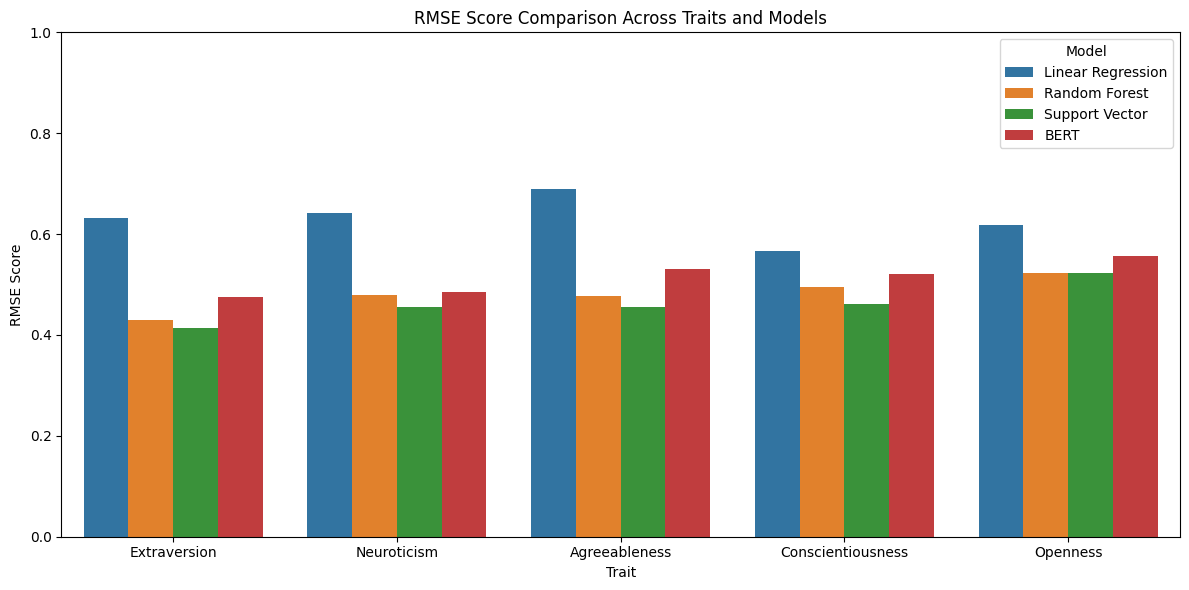

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Trait': ['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness'],
    'Linear Regression': [0.6326, 0.6410, 0.6900, 0.5671, 0.6190],
    'Random Forest': [0.4305, 0.4797, 0.4776, 0.4951, 0.5230],
    'Support Vector': [0.4147, 0.4563, 0.4555, 0.4610, 0.5229],
    'BERT': [0.4762, 0.4844, 0.5308, 0.5208, 0.5557]
}

# Convert to long format for seaborn
df = pd.DataFrame(data)
df_long = pd.melt(df, id_vars='Trait', var_name='Model', value_name='RMSE Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Trait', y='RMSE Score', hue='Model', data=df_long)
plt.title('RMSE Score Comparison Across Traits and Models')
plt.ylim(0, 1)  # Optional: keep consistent y-axis range
plt.legend(title='Model')
plt.tight_layout()
plt.show()
